In [0]:
!pip install pandas
!pip install numpy
!pip install matplotlib
!pip install sklearn
!pip install xgboost

In [0]:
# imported important libraries to work on data
import math

import pandas as pd
import numpy as np
import gc
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.pyplot import figure
from matplotlib import rcParams

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, f1_score , precision_score, accuracy_score
from imblearn.over_sampling import SMOTE

from xgboost import XGBClassifier
pd.set_option('display.max_columns', 500)

In [0]:
df = pd.read_csv('./dateProcessedData.csv')

In [0]:
y = df['FraudFound_P']
X = df.drop(columns='FraudFound_P', axis=1)

In [0]:
# for plotting
features = dict()
for col, index in zip(X.columns, range(len(X.columns))):
    features['f'+str(index)] = col 

In [0]:
# oversampling
sm = SMOTE(random_state=2019, k_neighbors=5)
X_re, y_re = sm.fit_resample(X, y)

In [0]:
# splitting into train and test data
X_train, X_test, y_train, y_test = train_test_split(X_re, y_re, shuffle = True, random_state = 53, test_size=0.30)

In [32]:
# model creation with best parameters and trainig
xgb4 = XGBClassifier(
 learning_rate =0.03,
 n_estimators=5000,
 early_stopping_rounds=50,
 max_depth=2,
 min_child_weight=4,
 gamma=1e-5,
 subsample=0.6,
 colsample_bytree=0.6,
 reg_alpha=1e-5,
 objective= 'binary:logistic',
 nthread=4,
 scale_pos_weight=1,
 seed=27)
xgb4.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.6, early_stopping_rounds=50, gamma=1e-05,
       learning_rate=0.03, max_delta_step=0, max_depth=2,
       min_child_weight=4, missing=None, n_estimators=5000, n_jobs=1,
       nthread=4, objective='binary:logistic', random_state=0,
       reg_alpha=1e-05, reg_lambda=1, scale_pos_weight=1, seed=27,
       silent=True, subsample=0.6)

In [33]:
# checking the model's performance on the test data
gbm_best_pred = xgb4.predict(X_test)
print(f'the f1 score of the model is : {f1_score(y_test, gbm_best_pred)}')
print(f'accuracy of the model is : {accuracy_score(y_test, gbm_best_pred)}')
print(f'precision of the model is : {precision_score(y_test, gbm_best_pred)}')
print(f'{confusion_matrix(y_test, gbm_best_pred)}')

the f1 score of the model is : 0.9651551312649164
accuracy of the model is : 0.9664161938353013
precision of the model is : 0.9937745740498034
[[3269   19]
 [ 200 3033]]


/usr/local/lib/python3.6/dist-packages/matplotlib/figure.py:2366: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


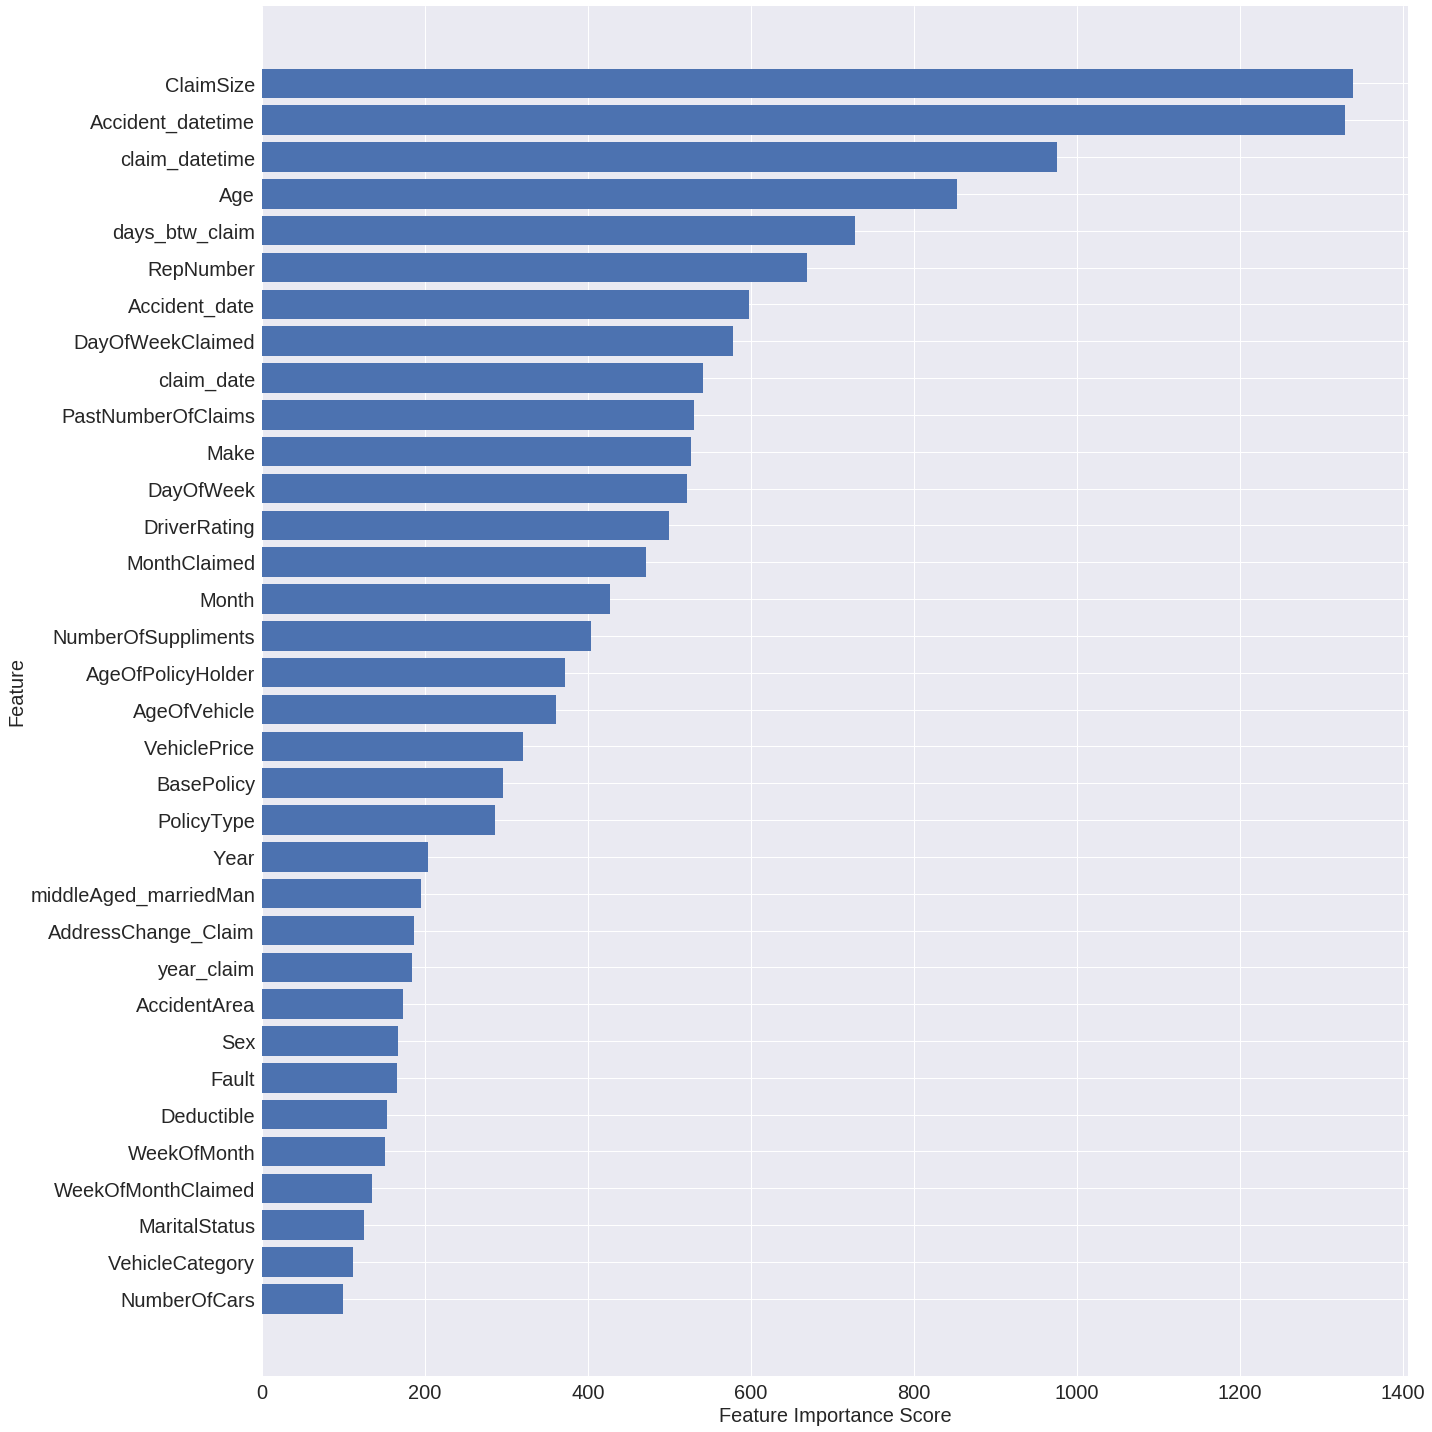

In [34]:
# plotting the graph of important features
feat_imp = pd.Series(xgb4.get_booster().get_fscore()).sort_values(ascending=True)

correct_labels = []
for index in feat_imp.index:
    correct_labels.append(features[index])
    
fig, ax = plt.subplots()

rcParams.update({'figure.autolayout': True})

fig.set_figheight(20)
fig.set_figwidth(20)

ax.barh(feat_imp.index, list(feat_imp), align='center')
ax.set_yticks(feat_imp.index)    
ax.set_yticklabels(correct_labels, rotation=0)
ax.set_xlabel('Feature Importance Score', fontsize=20)
ax.set_ylabel('Feature', fontsize=20)

ax.xaxis.set_tick_params(labelsize=20)
ax.yaxis.set_tick_params(labelsize=20)

plt.show()

In [0]:
# saving graph as a .png file
fig.savefig('impfeatures1.png')

In [0]:
# loading file for prediction
sub_file = pd.read_csv('./subPreorocessedData.csv')

In [0]:
# predicted the results
sub_file['FraudFound_P'] = xgb4.predict(sub_file.as_matrix())

In [0]:
# saved the predicted results
sub_file['FraudFound_P'].to_csv('./final_scores.csv')